<a href="https://colab.research.google.com/github/kimdarwin/ule/blob/main/2023_06_08_PEFT%EB%A1%9CLoRA%EB%A1%9C%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Aug 14 00:53:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 11.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
peft_model_id = "kkmkorea/qlora-polyglot-12.8b"
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

In [4]:
from peft import PeftModel, PeftConfig

In [5]:

config = PeftConfig.from_pretrained(peft_model_id)
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)
model = AutoModelForCausalLM.from_pretrained(config.base_model_name_or_path, quantization_config=bnb_config, device_map={"":0})
model = PeftModel.from_pretrained(model, peft_model_id)
tokenizer = AutoTokenizer.from_pretrained(config.base_model_name_or_path)

model.eval()

Loading checkpoint shards:   0%|          | 0/28 [00:00<?, ?it/s]

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): GPTNeoXForCausalLM(
      (gpt_neox): GPTNeoXModel(
        (embed_in): Embedding(30080, 5120)
        (emb_dropout): Dropout(p=0.0, inplace=False)
        (layers): ModuleList(
          (0-39): 40 x GPTNeoXLayer(
            (input_layernorm): LayerNorm((5120,), eps=1e-05, elementwise_affine=True)
            (post_attention_layernorm): LayerNorm((5120,), eps=1e-05, elementwise_affine=True)
            (post_attention_dropout): Dropout(p=0.0, inplace=False)
            (post_mlp_dropout): Dropout(p=0.0, inplace=False)
            (attention): GPTNeoXAttention(
              (rotary_emb): GPTNeoXRotaryEmbedding()
              (query_key_value): Linear4bit(
                in_features=5120, out_features=15360, bias=True
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


### 질문: 개 35마리

### 답변: shibes?count=35?count
['https://cdn.shibe.online/shibes/6fb5df5dc5fa3d8f86a86f6b7a209b52fdc4cd63.jpg', 'https://cdn.shibe.online/shibes/79aa94c0f2913fb403f46fbf6cecc3d58a040a17.jpg', 'https://cdn.shibe.online/shibes/90c89ed7dae2c52e33713566d61b1eb90479b408.jpg', 'https://cdn.shibe.online/shibes/6b0d877b11659f27eec15d5ec06c979abc7d4d26.jpg', 'https://cdn.shibe.online/shibes/d331b17a4172b41de3f3983a59b392ccaf32f82a.jpg', 'https://cdn.shibe.online/shibes/1481eb9b9924cbd6b7a2b6ec84e9ebfebdef411c.jpg', 'https://cdn.shibe.online/shibes/fd7c2046623a337691936c660660a160b1c44a88.jpg', 'https://cdn.shibe.online/shibes/340c876e41219362375d33a7cfae752c7b09ee45.jpg', 'https://cdn.shibe.online/shibes/ad8fae7d6e2da2fc83243d00efd9d58aa10e1183.jpg', 'https://cdn.shibe.online/shibes/20c23848928aa2d16967187c269f9173c906bc9b.jpg', 'https://cdn.shibe.online/shibes/781875ce8694dbc003eb2ad234e80e26eb7db84c.jpg', 'https://cdn.shibe.online/shibes/977a116f27c0d518cfc89bc85da2b6449cb716b1

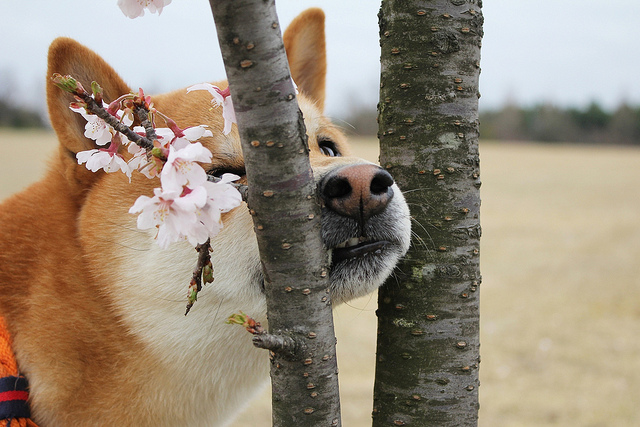

In [50]:
#!pip install requests
from io import BytesIO
import json
from PIL import Image
from requests import get
import cv2
import numpy as np
import requests
#http://shibe.online/api/
def download(url):
    response = get(url)               # get request
    return response.content

def gen(x):
    q = f"### 질문: {x}\n\n### 답변:"
    # print(q)
    gened = model.generate(
        **tokenizer(
            q,
            return_tensors='pt',
            return_token_type_ids=False
        ).to('cuda'),
        max_new_tokens=14,
        early_stopping=True,
        do_sample=True,
        eos_token_id=2,
    )
    print(tokenizer.decode(gened[0]))

    url = tokenizer.decode(gened[0])
    url = url[url.find('답변: ')+4:url.rfind('?')]
    url = 'http://shibe.online/api/'+url
    j = json.loads(download(url))
    jpgurl = j[0]
    print(j)
    print(str(jpgurl))
    #image = gr.Image(jpgurl)
    r = requests.get(jpgurl)
    i = Image.open(BytesIO(r.content))

    '''
    image_nparray = np.asarray(bytearray(requests.get(jpgurl).content), dtype=np.uint8)
    image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)
    print(image.shape)
    #cv2.imshow('Image from url', image)
    cv2.waitKey(0)

    # convert from BGR to RGB
    color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # convert from openCV2 to PIL
    image2=Image.fromarray(color_coverted)
    '''
    '''
    import cv2
    from google.colab.patches import cv2_imshow
    img_path = jpgurl
    image = cv2.imread(img_path)
    cv2_imshow(image)
    '''
    #image = gr.Image(image2)


    return i
gen('개 35마리')

In [20]:
#gen('개 35마리')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:399: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


### 질문: 개 35마리

### 답변: shibes?count=35?count


'http://shibe.online/api/shibes?count=35'

In [ ]:
#gen('새 56마리')

import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install gradio

In [ ]:
import gradio as gr

def greet(name):
    return gen(name)

demo = gr.Interface(
    fn=greet,
    inputs=gr.Textbox(lines=2, placeholder="입력: 개 n마리 or 새 n마리 or 고양이 n마리"),
    #outputs="text",
    #outputs="image",
    outputs=gr.Image(type='pil'),
)
demo.launch(share=True, debug=True)
#demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://8ff921123083ffb1b5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:399: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


### 질문: 개 10마리

### 답변: shibes?count=10?count
['https://cdn.shibe.online/shibes/b7741f350ade7aa45c98519f45cbcf38b823f03b.jpg', 'https://cdn.shibe.online/shibes/b08a7a1d81b7fd488907529c6d5d04583c19b2c1.jpg', 'https://cdn.shibe.online/shibes/6c45c7ead381b5d1edd185795119978b58246e02.jpg', 'https://cdn.shibe.online/shibes/5cc1dc6d240234ed263384e8d017b35444cee42c.jpg', 'https://cdn.shibe.online/shibes/8bc97c2d5d9f4dc74113da2e319f1f0f92fdd9ec.jpg', 'https://cdn.shibe.online/shibes/6f5188cf42fc65cec5b346607e6689c5e06910a9.jpg', 'https://cdn.shibe.online/shibes/571f04485869454a4d5f9cf201ed292b411a28f2.jpg', 'https://cdn.shibe.online/shibes/ef648c4af90dd0dbc7cb8a8cd3738621240afa8e.jpg', 'https://cdn.shibe.online/shibes/9fef72ff0e0b17b1754a9cb84a9507e71e89aea1.jpg', 'https://cdn.shibe.online/shibes/42618946f18e14493b5e611cc60c533f045a21ca.jpg']
https://cdn.shibe.online/shibes/b7741f350ade7aa45c98519f45cbcf38b823f03b.jpg


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


### 질문: 새 1마

### 답변: birds?count=1?count
['https://cdn.shibe.online/birds/3f891803d936c259ac50b0449e73d2af7241f63f.jpg']
https://cdn.shibe.online/birds/3f891803d936c259ac50b0449e73d2af7241f63f.jpg


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


### 질문: 고양이 1마리 그려줘

### 답변: cats?count=1?counts
['https://cdn.shibe.online/cats/a76ccc3a6cffb239519d1e50fa4d1470505e105c.jpg']
https://cdn.shibe.online/cats/a76ccc3a6cffb239519d1e50fa4d1470505e105c.jpg


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


### 질문: 시바개 마리

### 답변: shibes?count=3?count
['https://cdn.shibe.online/shibes/6e7e3e6a60dcd4b27ac6940a8f44893010f171e4.jpg', 'https://cdn.shibe.online/shibes/258fee55977882da6dd51f682e46953973d71932.jpg', 'https://cdn.shibe.online/shibes/60b84882c1176366eecf0403c13ccfda07d60692.jpg']
https://cdn.shibe.online/shibes/6e7e3e6a60dcd4b27ac6940a8f44893010f171e4.jpg


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


### 질문: 시바견 1마리 그림

### 답변: shiba?count=1?count


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1431, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = context.run(func, *args)
  File "/usr/local/lib/python3.10/dist-packages/gradio/utils.py", line 706, in wrapper
    response = f(*args, **kwargs)
  Fi

### 질문: 시바견 1마리

### 답변: shibes?count=1?count
['https://cdn.shibe.online/shibes/2efa94617cfc434ac45c243fee71041e3b7c4439.jpg']
https://cdn.shibe.online/shibes/2efa94617cfc434ac45c243fee71041e3b7c4439.jpg
